           date                open                high                 low  \
1    2002-05-23  1.1564290523529053  1.2428569793701172  1.1457140445709229   
2    2002-05-24   1.214285969734192   1.225000023841858  1.1971429586410522   
3    2002-05-28  1.2135709524154663  1.2321430444717407   1.157142996788025   
4    2002-05-29  1.1642860174179077  1.1642860174179077  1.0857139825820923   
5    2002-05-30  1.1078569889068604  1.1078569889068604  1.0714290142059326   
...         ...                 ...                 ...                 ...   
5798 2025-06-06  1259.4100341796875              1260.0   1235.550048828125   
5799 2025-06-09  1238.8800048828125  1238.8800048828125  1221.5699462890625   
5800 2025-06-10    1227.52001953125    1227.52001953125  1180.6099853515625   
5801 2025-06-11  1202.5999755859375     1228.2900390625   1196.010009765625   
5802 2025-06-12  1222.5899658203125              1230.0     1211.9599609375   

                   close           adj_close     vo

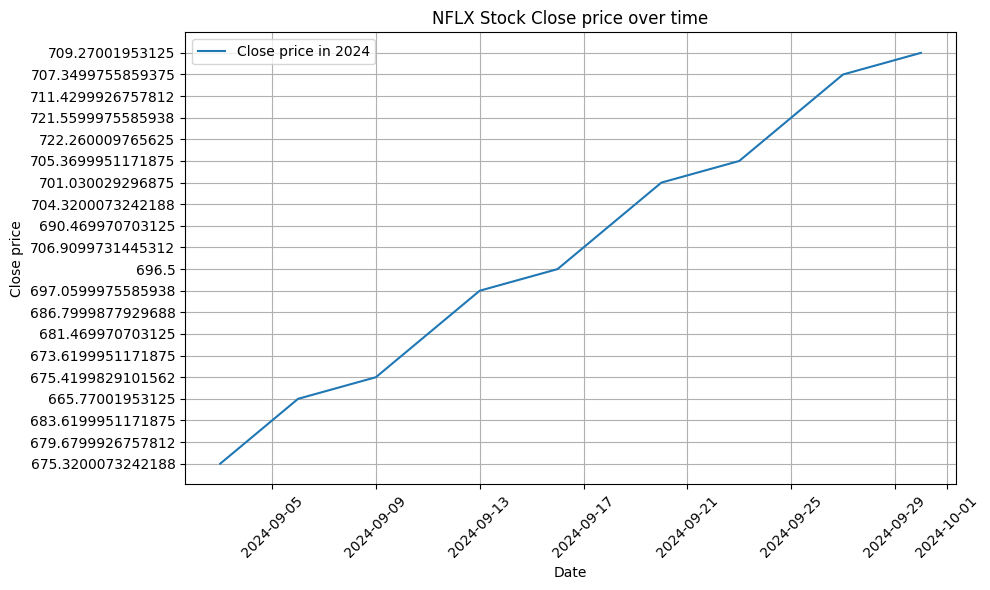

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# File path to your CSV
file_path = r"C:\Users\44790\Documents\projects\NFLX_stocks.csv"

# Loading CSV with parsed dates
df = pd.read_csv(file_path, parse_dates=['date'])
df = df.drop(df.index[0])

# Sort by date just in case
df = df.sort_values(by='date')
print(df)

# Set the datetime column as the index
df.set_index('date', inplace=True)



filtered = df.loc['2024-09']


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(filtered.index, filtered['close'], label='Close price in 2024', markersize = 10)

plt.xlabel('Date')
plt.ylabel('Close price')
plt.title('NFLX Stock Close price over time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

In [97]:
import pandas as pd

# Make sure the index is datetime
df.index = pd.to_datetime(df.index)

start = input('Enter start mean date (YYYY-MM-DD): ')
end = input('Enter end mean date (YYYY-MM-DD): ')

# Filter the DataFrame by date range
filtered = df.loc[start:end]
# Loop over rows
for col in filtered.columns:
    scol = float(0)
    v = 0
    for idx, row in filtered.iterrows():
       v = v +1
       scol = scol + float(row[col])
   
    print(col)
    print(scol/v) 

Enter start mean date (YYYY-MM-DD):  2023-09-12
Enter end mean date (YYYY-MM-DD):  2023-12-08


open
417.4290475996714
high
421.8331759013827
low
412.33111184740824
close
416.3293636261471
adj_close
416.3293636261471
volume
5344693.650793651


C:\Users\44790\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


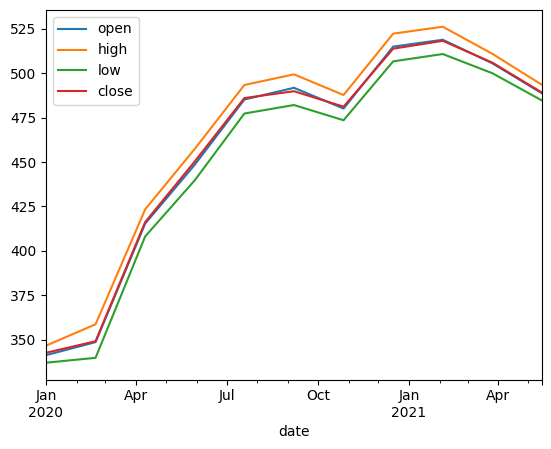

365 days 00:00:00
182
2 days 00:00:00
224.05074329277275
open
225.27548816416433
high
219.73555587246992
low
220.376508678598
close
220.376508678598
adj_close
2200907.358719732
volume
127.73095613030573
open
130.01528584820252
high
124.7198887063589
low
126.30819742932185
close
126.30819742932185
adj_close
2357337.290097816
volume
128.06745096318295
open
129.75453244129596
high
123.98510065527725
low
124.6277371140417
close
124.6277371140417
adj_close
2353285.1986637744
volume
224.3324356098927
open
226.3042818297327
high
216.38385335496045
low
216.6941011250145
close
216.6941011250145
adj_close
2591315.198890324
volume
158.84234628738665
open
160.37811230349777
high
156.17918552585397
low
157.4578892878075
close
157.4578892878075
adj_close
2850410.749738048
volume
118.33301921290312
open
119.43009658783694
high
116.3085980233897
low
116.91321763367691
close
116.91321763367691
adj_close
4839782.116996591
volume
146.5367216494808
open
146.8825171667201
high
143.60803418319162
low
145.12

In [220]:
#N day moving average
import math
import matplotlib.pyplot as plt
from datetime import datetime
def average(days,start,end):

    totdays = pd.to_datetime(end) - pd.to_datetime(start)
    print (totdays)
#Intervals is the number of n day averages we can take between the start and end date
    Intervals = math.floor(totdays.total_seconds()/(float(days)*86400))
    print(Intervals)

    days = int(days)  # convert string input to int
    duration = pd.to_timedelta(days, unit='d')
    print(duration) 

    start = pd.to_datetime(start)
#Initiating data frame g to store the average's
    g = pd.DataFrame(columns=['date', 'open', 'high','low','close','adj_close','volume','vol'])
#looping over the n day sets within the dataset df.
    for i in range (Intervals):
        filtered = df.loc[start + i *duration :start + (i+1)* duration]
    #Iterating over all the rows in the n day datasets and finding the averages of the columns.
        for col in filtered.columns:
            scol = float(0)
            vol = float(0)
            v = 1
            for idx, row in filtered.iterrows():
               v = v +1
               scol = scol + float(row[col])
            #adding averages to g our data frame
            g.at[i,'date'] = start + i *duration
            g.at[i,col]= scol/v
            for idx, row in filtered.iterrows():
               v = v +1
               vol = vol + (float(row[col]) - g.at[i,col])**2
            vol = (vol/v)**(1/2)
            vol = vol * (days)**(1/2)
            g.at[i,'vol'] = vol
            print(g.at[i,'vol'])
            print(col)
    
    print(g)


g.plot(x='date', y=['open','high','low','close'], kind='line')

plt.show()






average(2,datetime.strptime('2020-10-10',"%Y-%m-%d"),datetime.strptime('2021-10-10',"%Y-%m-%d"))


         date  open  high   low  close  adj_close   volume
0  2023-11-01  25.0  26.5  24.8   25.7       25.7  1000000


<Figure size 800x500 with 0 Axes>

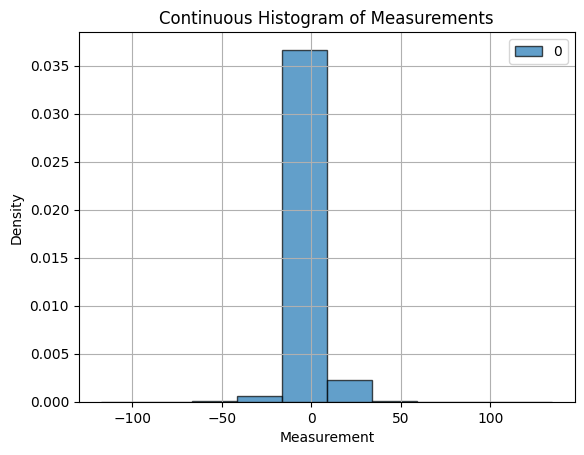

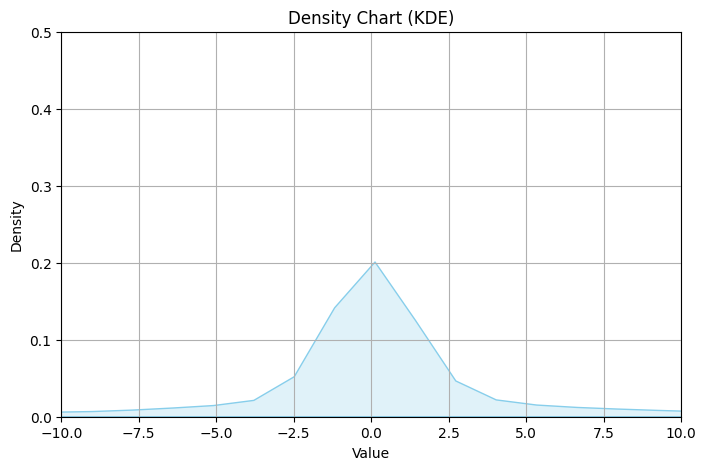

In [249]:
#does the data take a random walk


import pandas as pd

# Convert 'open' column to numeric
df['open'] = pd.to_numeric(df['open'], errors='coerce')

# Calculate difference manually
dist = []
for i in range(1, len(df)):
    diff = (df['open'].iloc[i] - df['open'].iloc[i - 1])
    dist.append(diff)

k = pd.DataFrame(dist)
plt.figure(figsize=(8, 5))
k.plot(kind='hist', bins=10, density=True, alpha=0.7, edgecolor='black')
plt.xlabel('Measurement')
plt.ylabel('Density')
plt.title('Continuous Histogram of Measurements')
plt.grid(True)
plt.show()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming dist is a list or Series of numeric values
k = pd.DataFrame(dist , columns=['value'])

plt.figure(figsize=(8, 5))
sns.kdeplot(data=k, x='value', fill=True, color='skyblue')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Density Chart (KDE)')

plt.xlim(-10, 10)   # Set x-axis range
plt.ylim(0, 0.5)  
plt.grid(True)
plt.show()

